# Importing Python modules

In [31]:
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [32]:
x = pickle.load(open('preprocessing/x_norm.pickle', 'rb'))
y = pickle.load(open('preprocessing/y_norm.pickle', 'rb'))

In [33]:
x

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,index,city_1,fct_Favorite,fg_Favorite,fg_Uniform
0,-0.120864,-1.095947,0.235706,-1.522522,-0.624265,-0.512888,0.430600,0.164113,-0.542767,0,1,0,0,1
1,-0.120864,-1.095947,-0.470084,1.042308,0.441273,0.740126,-0.731524,-0.806694,-0.884546,1,1,1,0,1
2,1.815990,-1.095947,-0.822978,0.843313,0.204487,0.461678,-0.280848,0.412459,0.368644,2,1,1,0,1
3,-1.089290,0.672765,-0.470084,-0.958702,-0.624265,-0.791336,-0.665085,-0.671233,-0.428840,3,1,1,0,1
4,0.847563,0.672765,0.588600,0.821202,3.282708,2.271587,-0.276972,0.096382,3.330728,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,-0.120864,-0.506377,-0.470084,0.191050,-0.032299,0.183231,-0.409296,-0.174541,0.140791,3204,1,1,0,1
3185,-0.120864,-1.685518,-0.822978,0.003110,0.441273,0.740126,0.756703,2.263765,-0.200988,3205,1,1,0,1
3186,-0.120864,0.083194,-0.117189,-0.074278,-0.032299,-0.234441,-0.175100,0.367305,0.140791,3206,1,0,0,1
3187,-0.120864,0.672765,-0.117189,0.224216,0.204487,-0.095217,-0.111983,0.322151,0.368644,3207,1,1,0,1


In [34]:
x.drop('index', axis=1 , inplace=True)

In [36]:
x.columns

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'city_1', 'fct_Favorite',
       'fg_Favorite', 'fg_Uniform'],
      dtype='object')

# Multiple Linear Regression
$\hat y = a + b_1 X_1 + b_2 X_2 + ... + b_n X_n $

In [37]:
# convert into array

x = x.values
y = y.values

In [38]:
x.shape, y.shape

((3189, 13), (3189, 1))

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [40]:
def multi_regression():
    model = Sequential([
        layers.Dense(units=1, input_shape=(13,))
    ])
    #
    loss = tf.keras.losses.mean_squared_error
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    # compile
    model.compile(loss = loss, optimizer = optimizer, metrics =['mse'])
    return model

In [42]:
model = multi_regression()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14 (56.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [44]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2551, 13), (638, 13), (2551, 1), (638, 1))

In [46]:
# train the model
history = model.fit(x_train, y_train, batch_size=100, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
26/26 [==============================] - 1s 20ms/step - loss: 0.6095 - mse: 0.6095 - val_loss: 0.5689 - val_mse: 0.5689
Epoch 2/200
26/26 [==============================] - 0s 10ms/step - loss: 0.6016 - mse: 0.6016 - val_loss: 0.5616 - val_mse: 0.5616
Epoch 3/200
26/26 [==============================] - 0s 10ms/step - loss: 0.5938 - mse: 0.5938 - val_loss: 0.5555 - val_mse: 0.5555
Epoch 4/200
26/26 [==============================] - 0s 7ms/step - loss: 0.5867 - mse: 0.5867 - val_loss: 0.5495 - val_mse: 0.5495
Epoch 5/200
26/26 [==============================] - 0s 7ms/step - loss: 0.5794 - mse: 0.5794 - val_loss: 0.5440 - val_mse: 0.5440
Epoch 6/200
26/26 [==============================] - 0s 6ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.5383 - val_mse: 0.5383
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.5660 - mse: 0.5660 - val_loss: 0.5320 - val_mse: 0.5320
Epoch 8/200
26/26 [==============================] - 0s 3ms/step - loss: 0.5593 

In [47]:
hist = history.history
df_hist = pd.DataFrame(hist)

<Axes: >

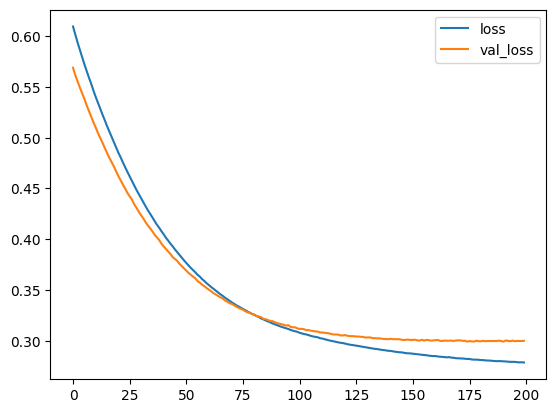

In [50]:
df_hist[['loss', 'val_loss']].plot()

# LASSO Regression
- L1 Regularization

In [51]:
from tensorflow.keras.regularizers import l1

In [52]:
def lasso_regression(penality):
    model = Sequential([
        layers.Dense(units=1, input_shape=(13,), kernel_regularizer=l1(penality))
    ])
    # loss and optimizer
    loss = tf.keras.losses.mean_squared_error
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    # compile
    model.compile(optimizer=optimizer, loss=loss)
    return model

In [54]:
penality = [1e-10, 3e-10, 6e-10, 9e-10,
            1e-9, 3e-9, 6e-9, 9e-9,
            1e-8, 3e-8, 6e-8, 9e-8,
            1e-7, 3e-7, 6e-7, 9e-7,
            1e-6, 3e-6, 6e-6, 9e-6,
            1e-5, 3e-5, 6e-5, 9e-5,
            1e-4, 3e-4, 6e-4, 9e-4,
            1e-3, 3e-3, 6e-3, 9e-3,
            1e-2, 3e-2, 6e-2, 9e-2,
            1e-1, 3e-1, 6e-1, 1, 3, 6, 10]

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 2.0616 - val_loss: 1.8357
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8331 - val_loss: 1.6328
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6444 - val_loss: 1.4675
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4923 - val_loss: 1.3299
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3633 - val_loss: 1.2188
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2527 - val_loss: 1.1249
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1593 - val_loss: 1.0409
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0807 - val_loss: 0.9722
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0126 - val_loss: 0.9161
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

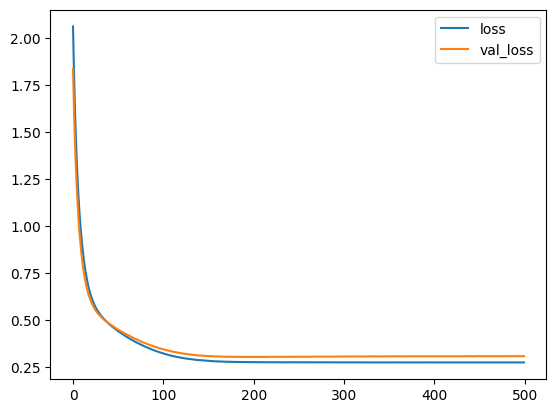

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 1.6471 - val_loss: 1.6093
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4404 - val_loss: 1.4250
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2767 - val_loss: 1.2759
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1465 - val_loss: 1.1576
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0437 - val_loss: 1.0636
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9622 - val_loss: 0.9869
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8973 - val_loss: 0.9232
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8432 - val_loss: 0.8722
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.7994 - val_loss: 0.8264
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

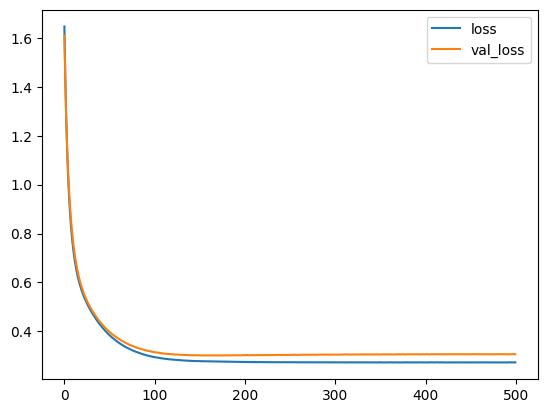

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 9ms/step - loss: 3.3846 - val_loss: 3.3426
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.9619 - val_loss: 2.9587
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 2.6120 - val_loss: 2.6209
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 2.3101 - val_loss: 2.3438
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 2.0630 - val_loss: 2.1082
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 1.8533 - val_loss: 1.9087
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6799 - val_loss: 1.7341
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5316 - val_loss: 1.5933
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4144 - val_loss: 1.4609
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

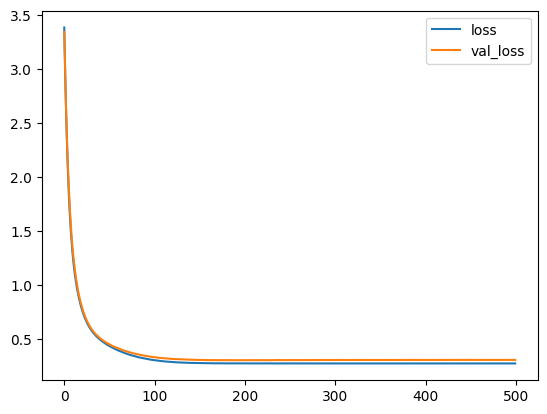

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 1.7786 - val_loss: 1.3827
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5613 - val_loss: 1.2121
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3772 - val_loss: 1.0742
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2257 - val_loss: 0.9613
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1019 - val_loss: 0.8719
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9982 - val_loss: 0.8019
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9154 - val_loss: 0.7432
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8433 - val_loss: 0.6982
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.7854 - val_loss: 0.6582
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

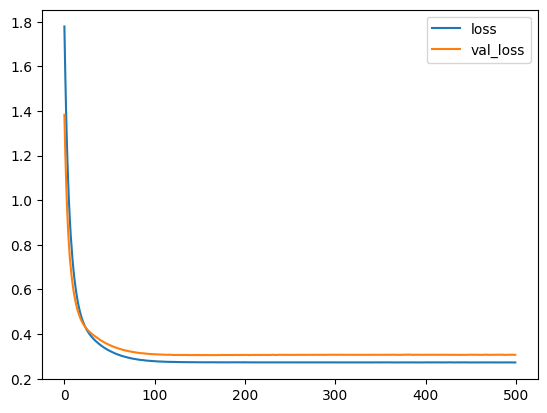

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 2.6112 - val_loss: 2.2956
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.2855 - val_loss: 2.0306
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.0086 - val_loss: 1.8171
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7823 - val_loss: 1.6361
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5945 - val_loss: 1.4912
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4439 - val_loss: 1.3695
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3196 - val_loss: 1.2692
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2186 - val_loss: 1.1869
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1358 - val_loss: 1.1191
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

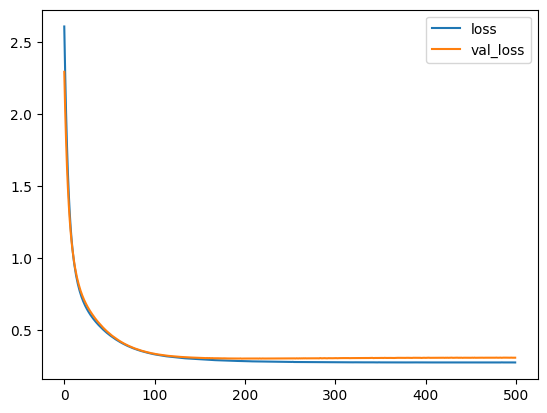

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 9ms/step - loss: 2.8401 - val_loss: 2.5235
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5696 - val_loss: 2.2972
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 2.3378 - val_loss: 2.0974
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 2.1379 - val_loss: 1.9249
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9606 - val_loss: 1.7705
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8013 - val_loss: 1.6301
Epoch 7/500
26/26 [==============================] - 0s 2ms/step - loss: 1.6539 - val_loss: 1.5067
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5232 - val_loss: 1.3927
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4054 - val_loss: 1.2875
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

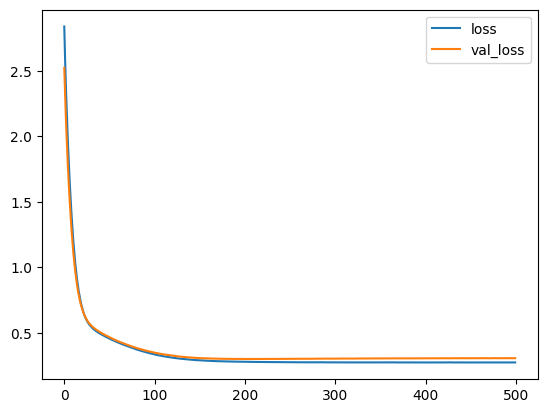

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 3.5054 - val_loss: 3.0914
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.1897 - val_loss: 2.8312
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 2.9106 - val_loss: 2.5987
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 2.6744 - val_loss: 2.3853
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 2.4557 - val_loss: 2.2054
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 2.2667 - val_loss: 2.0377
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 2.0928 - val_loss: 1.8950
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.9434 - val_loss: 1.7593
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.8048 - val_loss: 1.6390
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

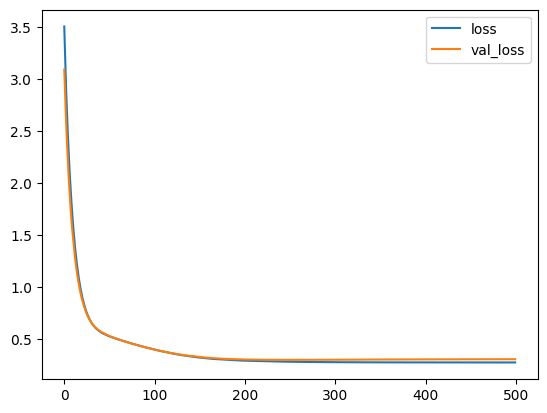

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 1.7547 - val_loss: 1.7721
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5267 - val_loss: 1.5427
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3360 - val_loss: 1.3464
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1741 - val_loss: 1.1852
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0401 - val_loss: 1.0483
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9289 - val_loss: 0.9387
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8389 - val_loss: 0.8489
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.7650 - val_loss: 0.7737
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.7042 - val_loss: 0.7150
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

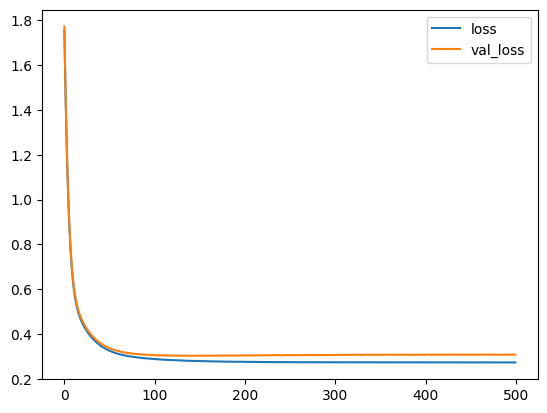

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 1.9900 - val_loss: 1.8142
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.7412 - val_loss: 1.6067
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5398 - val_loss: 1.4404
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3898 - val_loss: 1.3075
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2688 - val_loss: 1.2122
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1791 - val_loss: 1.1303
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1069 - val_loss: 1.0668
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0526 - val_loss: 1.0135
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0076 - val_loss: 0.9735
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

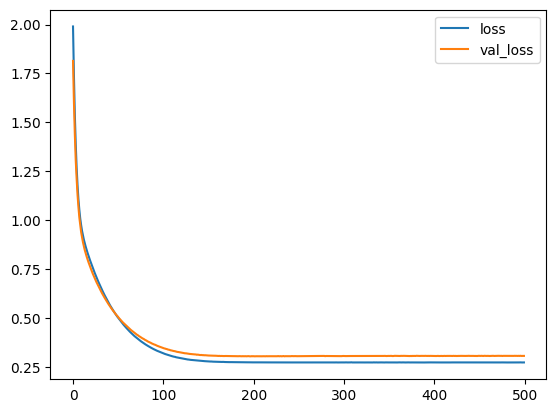

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 1.8047 - val_loss: 1.5119
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.5989 - val_loss: 1.3416
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4266 - val_loss: 1.2094
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2931 - val_loss: 1.0972
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1790 - val_loss: 1.0091
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0840 - val_loss: 0.9377
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0051 - val_loss: 0.8773
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9390 - val_loss: 0.8246
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8804 - val_loss: 0.7795
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

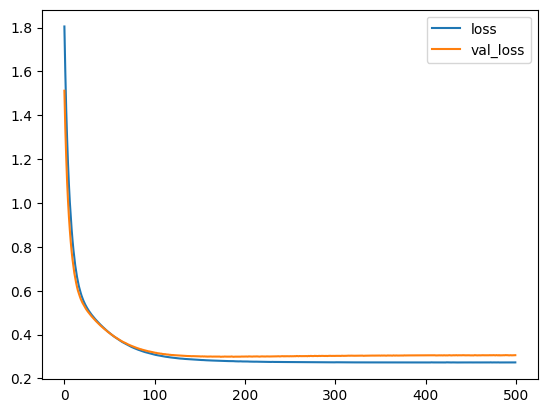

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 3.8589 - val_loss: 3.3696
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.5549 - val_loss: 3.1047
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 3.2852 - val_loss: 2.8600
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 3.0261 - val_loss: 2.6475
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 2.7990 - val_loss: 2.4450
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 2.5876 - val_loss: 2.2666
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 2.3930 - val_loss: 2.1060
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 2.2173 - val_loss: 1.9604
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 2.0627 - val_loss: 1.8210
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

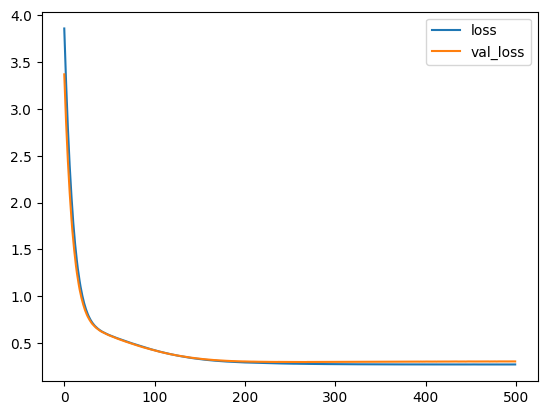

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 12ms/step - loss: 1.2455 - val_loss: 1.1828
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 1.1568 - val_loss: 1.1100
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0833 - val_loss: 1.0473
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0208 - val_loss: 0.9900
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 0.9639 - val_loss: 0.9369
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 0.9133 - val_loss: 0.8893
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 0.8673 - val_loss: 0.8473
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 0.8264 - val_loss: 0.8072
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 0.7884 - val_loss: 0.7712
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - 

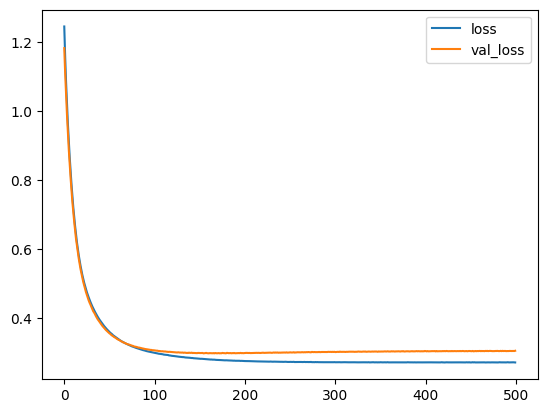

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 9ms/step - loss: 1.3240 - val_loss: 1.1734
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2177 - val_loss: 1.0895
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1278 - val_loss: 1.0142
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0460 - val_loss: 0.9489
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 0.9734 - val_loss: 0.8881
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 0.9061 - val_loss: 0.8334
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 0.8454 - val_loss: 0.7829
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 0.7903 - val_loss: 0.7374
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 0.7406 - val_loss: 0.6965
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

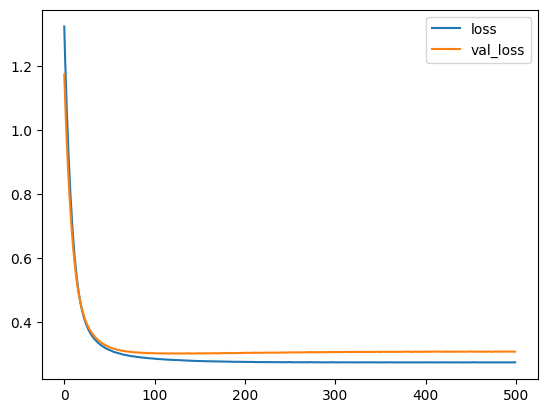

Running the model for lambda = 0.000000
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 2.4144 - val_loss: 2.2059
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 2.1821 - val_loss: 1.9994
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.9797 - val_loss: 1.8271
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.8077 - val_loss: 1.6798
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.6612 - val_loss: 1.5497
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 1.5316 - val_loss: 1.4408
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 1.4207 - val_loss: 1.3446
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3239 - val_loss: 1.2584
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2379 - val_loss: 1.1822
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

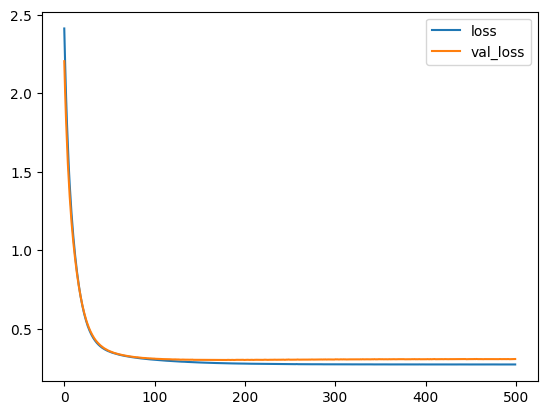

Running the model for lambda = 0.000001
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 4.1768 - val_loss: 3.5131
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.7308 - val_loss: 3.1334
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 3.3334 - val_loss: 2.8048
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 2.9818 - val_loss: 2.5138
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 2.6751 - val_loss: 2.2527
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 2.4085 - val_loss: 2.0231
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 2.1657 - val_loss: 1.8321
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.9598 - val_loss: 1.6544
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7698 - val_loss: 1.5064
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

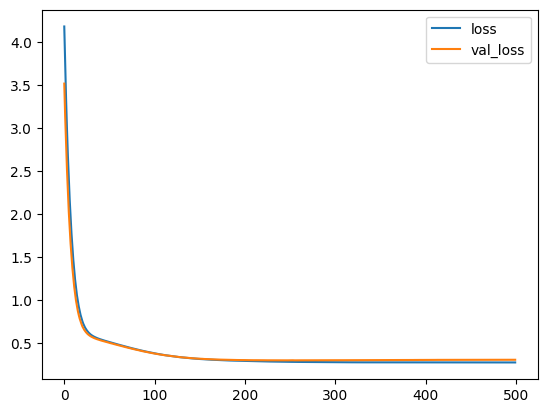

Running the model for lambda = 0.000001
Epoch 1/500
26/26 [==============================] - 1s 12ms/step - loss: 1.4117 - val_loss: 1.3316
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.3244 - val_loss: 1.2520
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2649 - val_loss: 1.1926
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2172 - val_loss: 1.1467
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 1.1775 - val_loss: 1.1070
Epoch 6/500
26/26 [==============================] - 0s 6ms/step - loss: 1.1415 - val_loss: 1.0717
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 1.1095 - val_loss: 1.0401
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0793 - val_loss: 1.0105
Epoch 9/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0509 - val_loss: 0.9828
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - 

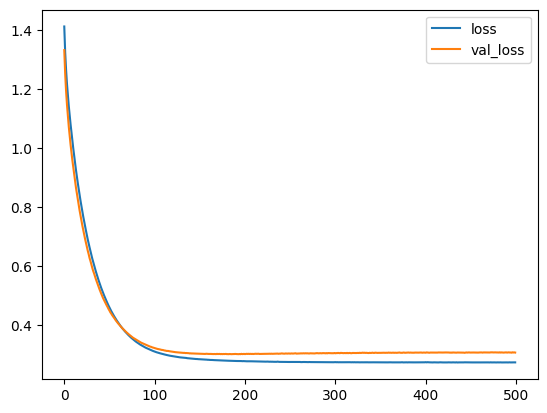

Running the model for lambda = 0.000001
Epoch 1/500
26/26 [==============================] - 1s 10ms/step - loss: 1.3485 - val_loss: 1.2449
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2156 - val_loss: 1.1341
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1096 - val_loss: 1.0442
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0232 - val_loss: 0.9708
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 0.9492 - val_loss: 0.9101
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 0.8846 - val_loss: 0.8520
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 0.8267 - val_loss: 0.8029
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 0.7755 - val_loss: 0.7595
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 0.7307 - val_loss: 0.7198
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - 

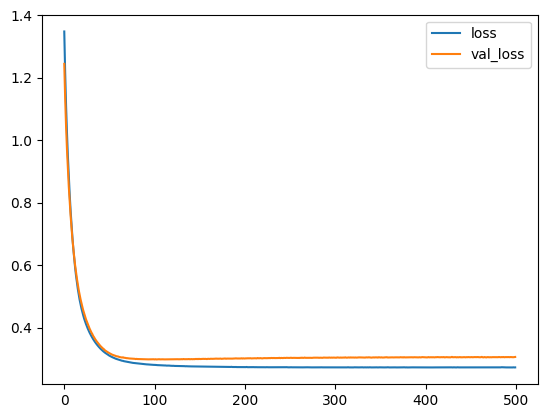

Running the model for lambda = 0.000003
Epoch 1/500
26/26 [==============================] - 1s 10ms/step - loss: 1.6849 - val_loss: 1.5494
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4427 - val_loss: 1.3467
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2576 - val_loss: 1.1924
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1192 - val_loss: 1.0759
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0130 - val_loss: 0.9887
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 0.9325 - val_loss: 0.9212
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 0.8704 - val_loss: 0.8687
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 0.8210 - val_loss: 0.8253
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.7811 - val_loss: 0.7879
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - 

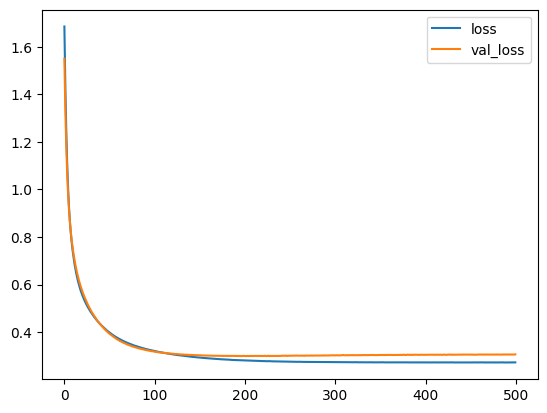

Running the model for lambda = 0.000006
Epoch 1/500
26/26 [==============================] - 1s 11ms/step - loss: 2.2247 - val_loss: 1.8970
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.9033 - val_loss: 1.6249
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6374 - val_loss: 1.4020
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.4132 - val_loss: 1.2224
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2306 - val_loss: 1.0742
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0849 - val_loss: 0.9487
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 0.9610 - val_loss: 0.8552
Epoch 8/500
26/26 [==============================] - 0s 6ms/step - loss: 0.8647 - val_loss: 0.7770
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.7869 - val_loss: 0.7134
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - 

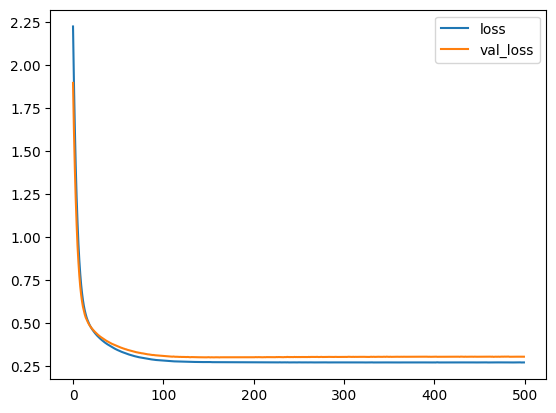

Running the model for lambda = 0.000009
Epoch 1/500
26/26 [==============================] - 1s 11ms/step - loss: 1.8325 - val_loss: 1.6784
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.6133 - val_loss: 1.4996
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 1.4384 - val_loss: 1.3560
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 1.2940 - val_loss: 1.2451
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 1.1803 - val_loss: 1.1538
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0889 - val_loss: 1.0782
Epoch 7/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0117 - val_loss: 1.0174
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 0.9485 - val_loss: 0.9658
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.8956 - val_loss: 0.9211
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - 

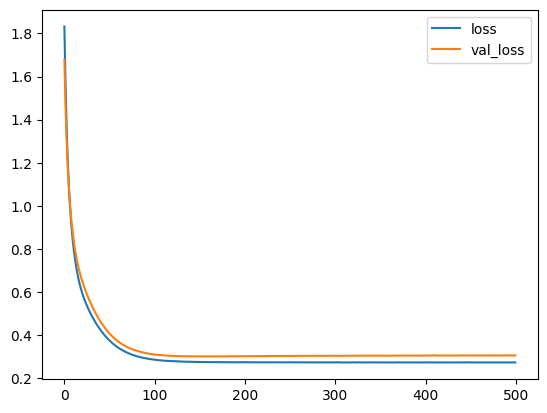

Running the model for lambda = 0.000010
Epoch 1/500
26/26 [==============================] - 1s 13ms/step - loss: 1.4856 - val_loss: 1.3455
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 1.3060 - val_loss: 1.1945
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 1.1584 - val_loss: 1.0734
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0382 - val_loss: 0.9744
Epoch 5/500
26/26 [==============================] - 0s 6ms/step - loss: 0.9406 - val_loss: 0.8951
Epoch 6/500
26/26 [==============================] - 0s 6ms/step - loss: 0.8629 - val_loss: 0.8317
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 0.7995 - val_loss: 0.7801
Epoch 8/500
26/26 [==============================] - 0s 7ms/step - loss: 0.7481 - val_loss: 0.7393
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.7065 - val_loss: 0.7046
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - 

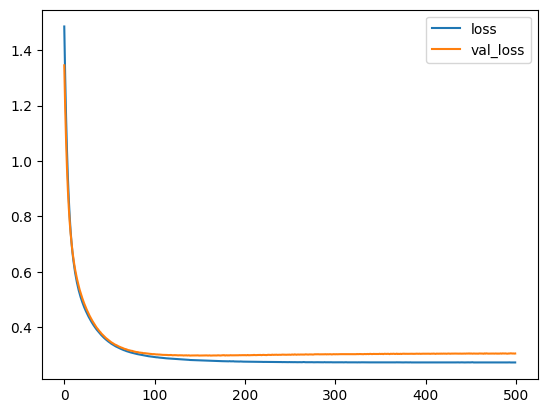

Running the model for lambda = 0.000030
Epoch 1/500
26/26 [==============================] - 1s 11ms/step - loss: 2.5111 - val_loss: 2.3076
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 2.2401 - val_loss: 2.0531
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 2.0024 - val_loss: 1.8348
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7979 - val_loss: 1.6474
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.6216 - val_loss: 1.4932
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 1.4743 - val_loss: 1.3576
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 1.3447 - val_loss: 1.2445
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2375 - val_loss: 1.1449
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1419 - val_loss: 1.0644
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - 

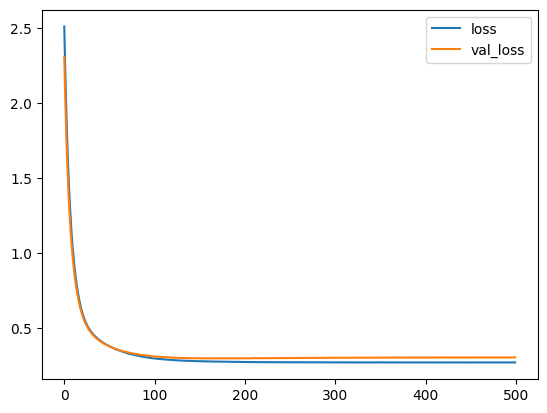

Running the model for lambda = 0.000060
Epoch 1/500
26/26 [==============================] - 1s 11ms/step - loss: 4.6200 - val_loss: 4.0301
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 4.0648 - val_loss: 3.5517
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 3.5746 - val_loss: 3.1399
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 3.1450 - val_loss: 2.7828
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 2.7694 - val_loss: 2.4718
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 2.4450 - val_loss: 2.1990
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 2.1611 - val_loss: 1.9615
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.9199 - val_loss: 1.7581
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7154 - val_loss: 1.5818
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - 

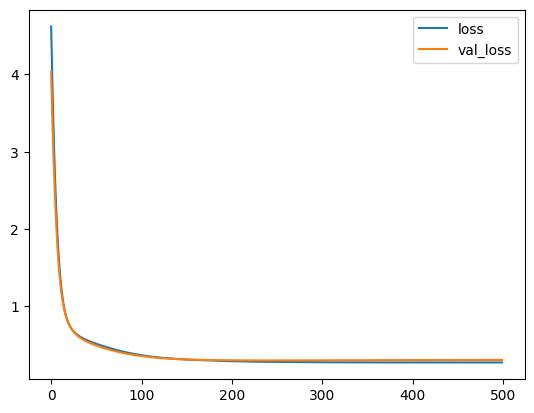

Running the model for lambda = 0.000090
Epoch 1/500
26/26 [==============================] - 1s 13ms/step - loss: 2.0181 - val_loss: 1.7784
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7761 - val_loss: 1.5797
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 1.5733 - val_loss: 1.4244
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.4129 - val_loss: 1.2906
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 1.2796 - val_loss: 1.1790
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1662 - val_loss: 1.0869
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0720 - val_loss: 1.0066
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 0.9896 - val_loss: 0.9386
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 0.9200 - val_loss: 0.8781
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - 

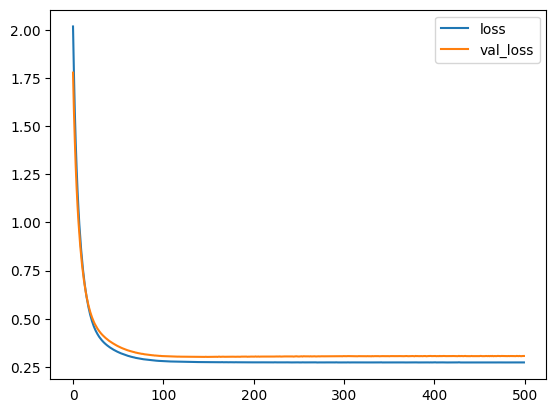

Running the model for lambda = 0.000100
Epoch 1/500
26/26 [==============================] - 1s 9ms/step - loss: 2.1364 - val_loss: 2.1902
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.8868 - val_loss: 1.9370
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.6772 - val_loss: 1.7271
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.5029 - val_loss: 1.5504
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.3577 - val_loss: 1.4019
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 1.2344 - val_loss: 1.2791
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 1.1322 - val_loss: 1.1740
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0428 - val_loss: 1.0878
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.9681 - val_loss: 1.0044
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - l

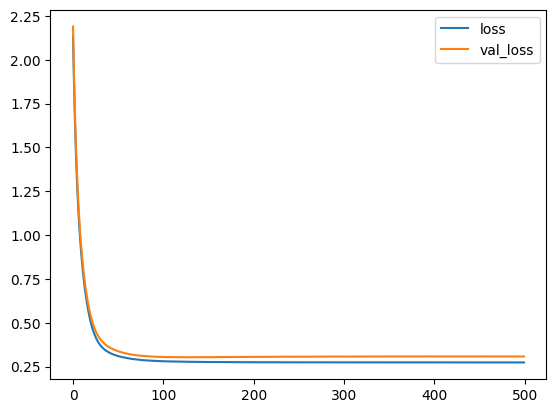

Running the model for lambda = 0.000300
Epoch 1/500
26/26 [==============================] - 1s 10ms/step - loss: 1.5709 - val_loss: 1.5568
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 1.3904 - val_loss: 1.3837
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2426 - val_loss: 1.2398
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1226 - val_loss: 1.1240
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0252 - val_loss: 1.0334
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 0.9481 - val_loss: 0.9558
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 0.8853 - val_loss: 0.8938
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 0.8341 - val_loss: 0.8440
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 0.7930 - val_loss: 0.7994
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - 

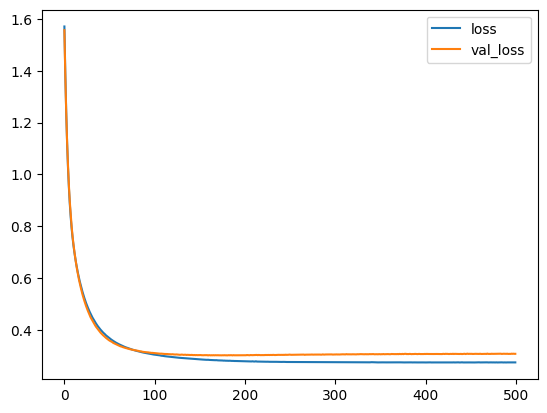

Running the model for lambda = 0.000600
Epoch 1/500
26/26 [==============================] - 1s 7ms/step - loss: 0.6995 - val_loss: 0.6717
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6564 - val_loss: 0.6376
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 0.6196 - val_loss: 0.6093
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 0.5899 - val_loss: 0.5848
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.5639 - val_loss: 0.5645
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 0.5419 - val_loss: 0.5466
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 0.5226 - val_loss: 0.5307
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.5066 - val_loss: 0.5162
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.4919 - val_loss: 0.5024
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - l

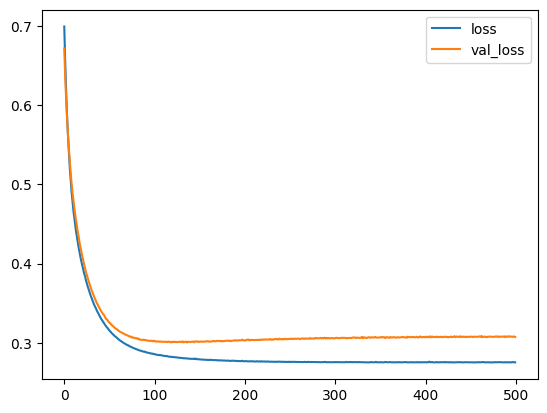

Running the model for lambda = 0.000900
Epoch 1/500
26/26 [==============================] - 1s 8ms/step - loss: 2.4696 - val_loss: 2.0534
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 2.1997 - val_loss: 1.8244
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.9686 - val_loss: 1.6211
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.7638 - val_loss: 1.4488
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 1.5919 - val_loss: 1.2978
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 1.4366 - val_loss: 1.1746
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 1.3032 - val_loss: 1.0664
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1868 - val_loss: 0.9704
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0837 - val_loss: 0.8888
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - l

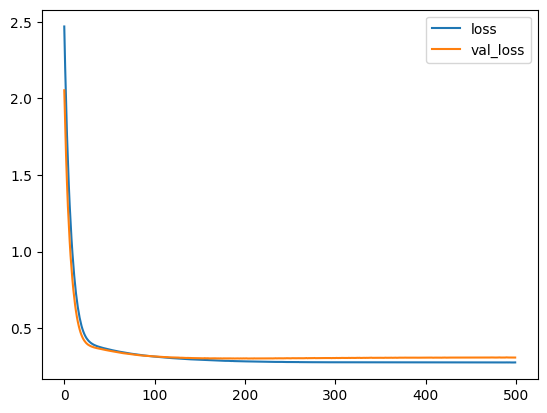

Running the model for lambda = 0.001000
Epoch 1/500
26/26 [==============================] - 1s 10ms/step - loss: 1.5942 - val_loss: 1.5299
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 1.4726 - val_loss: 1.4174
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 1.3696 - val_loss: 1.3138
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 1.2768 - val_loss: 1.2226
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1935 - val_loss: 1.1414
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 1.1185 - val_loss: 1.0675
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 1.0510 - val_loss: 1.0021
Epoch 8/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9897 - val_loss: 0.9409
Epoch 9/500
26/26 [==============================] - 0s 3ms/step - loss: 0.9341 - val_loss: 0.8866
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - 

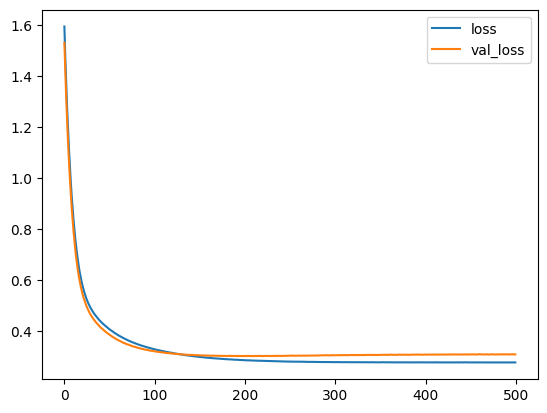

Running the model for lambda = 0.003000
Epoch 1/500
26/26 [==============================] - 1s 9ms/step - loss: 1.4674 - val_loss: 1.2501
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2737 - val_loss: 1.0945
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1125 - val_loss: 0.9672
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 0.9840 - val_loss: 0.8651
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 0.8798 - val_loss: 0.7853
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 0.7975 - val_loss: 0.7227
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 0.7321 - val_loss: 0.6730
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 0.6781 - val_loss: 0.6344
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.6356 - val_loss: 0.6024
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - l

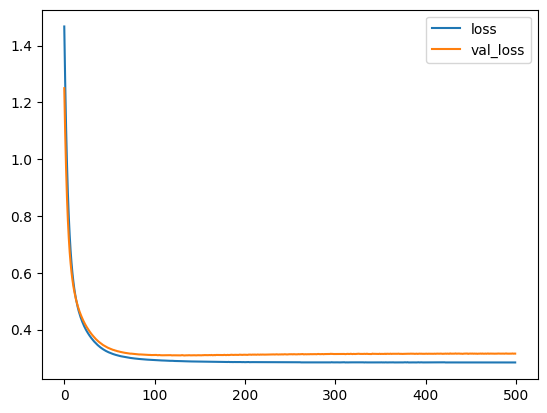

Running the model for lambda = 0.006000
Epoch 1/500
26/26 [==============================] - 1s 11ms/step - loss: 3.7272 - val_loss: 3.0762
Epoch 2/500
26/26 [==============================] - 0s 6ms/step - loss: 3.3933 - val_loss: 2.7983
Epoch 3/500
26/26 [==============================] - 0s 6ms/step - loss: 3.0953 - val_loss: 2.5585
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 2.8432 - val_loss: 2.3530
Epoch 5/500
26/26 [==============================] - 0s 6ms/step - loss: 2.6213 - val_loss: 2.1763
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 2.4321 - val_loss: 2.0219
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 2.2660 - val_loss: 1.8826
Epoch 8/500
26/26 [==============================] - 0s 6ms/step - loss: 2.1149 - val_loss: 1.7606
Epoch 9/500
26/26 [==============================] - 0s 6ms/step - loss: 1.9848 - val_loss: 1.6483
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - 

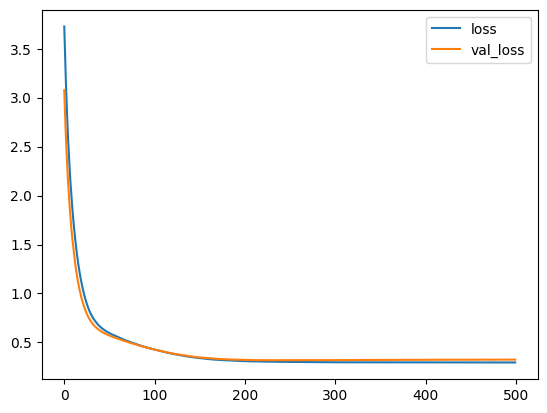

Running the model for lambda = 0.009000
Epoch 1/500
26/26 [==============================] - 1s 11ms/step - loss: 4.3216 - val_loss: 3.7952
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 3.8501 - val_loss: 3.3925
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 3.4334 - val_loss: 3.0521
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 3.0859 - val_loss: 2.7556
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 2.7805 - val_loss: 2.5090
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 2.5296 - val_loss: 2.2856
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 2.3106 - val_loss: 2.1061
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 2.1280 - val_loss: 1.9515
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.9740 - val_loss: 1.8201
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - 

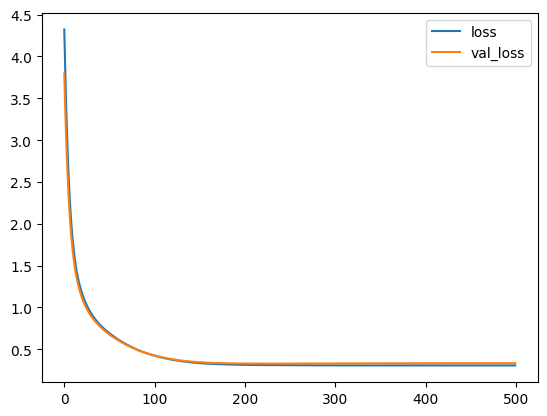

Running the model for lambda = 0.010000
Epoch 1/500
26/26 [==============================] - 1s 11ms/step - loss: 1.8920 - val_loss: 1.8187
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 1.6765 - val_loss: 1.6171
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.5037 - val_loss: 1.4613
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 1.3680 - val_loss: 1.3357
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.2598 - val_loss: 1.2374
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 1.1762 - val_loss: 1.1574
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 1.1070 - val_loss: 1.0955
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0508 - val_loss: 1.0410
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0034 - val_loss: 0.9951
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - 

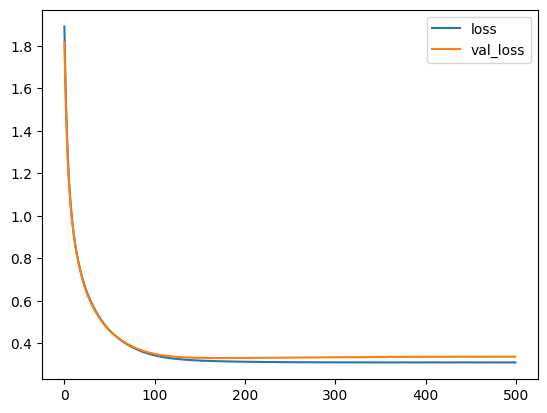

Running the model for lambda = 0.030000
Epoch 1/500
26/26 [==============================] - 1s 10ms/step - loss: 1.8472 - val_loss: 1.7523
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.6742 - val_loss: 1.6075
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.5341 - val_loss: 1.4876
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 1.4171 - val_loss: 1.3824
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 1.3165 - val_loss: 1.2920
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 1.2299 - val_loss: 1.2134
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 1.1546 - val_loss: 1.1440
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0883 - val_loss: 1.0825
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 1.0312 - val_loss: 1.0272
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - 

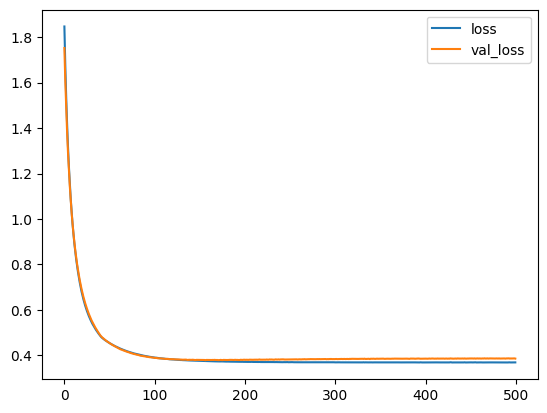

Running the model for lambda = 0.060000
Epoch 1/500
26/26 [==============================] - 1s 11ms/step - loss: 2.0670 - val_loss: 1.8647
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 1.8068 - val_loss: 1.6535
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 1.5954 - val_loss: 1.4802
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 1.4177 - val_loss: 1.3410
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 1.2777 - val_loss: 1.2207
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 1.1553 - val_loss: 1.1255
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0600 - val_loss: 1.0358
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 0.9733 - val_loss: 0.9635
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.9021 - val_loss: 0.8989
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - 

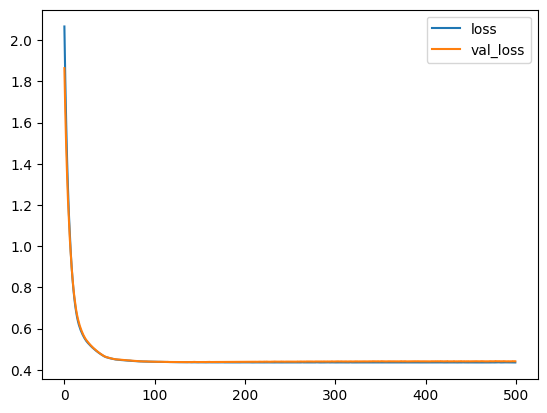

Running the model for lambda = 0.090000
Epoch 1/500
26/26 [==============================] - 1s 9ms/step - loss: 4.3327 - val_loss: 4.0210
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 3.9421 - val_loss: 3.6596
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 3.5856 - val_loss: 3.3444
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 3.2805 - val_loss: 3.0675
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 3.0097 - val_loss: 2.8178
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 2.7679 - val_loss: 2.5923
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 2.5549 - val_loss: 2.3914
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 2.3608 - val_loss: 2.2193
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 2.1954 - val_loss: 2.0588
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - l

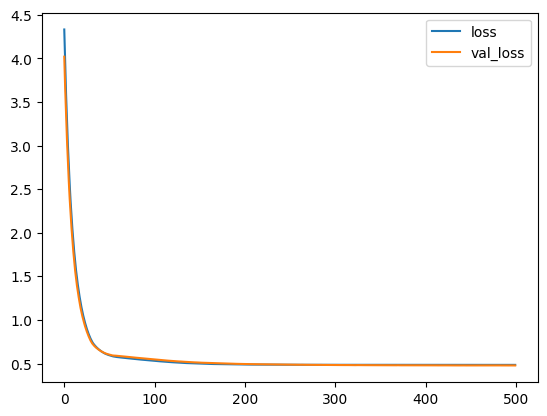

Running the model for lambda = 0.100000
Epoch 1/500
26/26 [==============================] - 1s 14ms/step - loss: 2.0393 - val_loss: 1.9379
Epoch 2/500
26/26 [==============================] - 0s 6ms/step - loss: 1.8025 - val_loss: 1.7427
Epoch 3/500
26/26 [==============================] - 0s 6ms/step - loss: 1.6100 - val_loss: 1.5860
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 1.4581 - val_loss: 1.4642
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 1.3383 - val_loss: 1.3584
Epoch 6/500
26/26 [==============================] - 0s 6ms/step - loss: 1.2422 - val_loss: 1.2696
Epoch 7/500
26/26 [==============================] - 0s 7ms/step - loss: 1.1615 - val_loss: 1.1979
Epoch 8/500
26/26 [==============================] - 0s 6ms/step - loss: 1.0949 - val_loss: 1.1332
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 1.0369 - val_loss: 1.0757
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - 

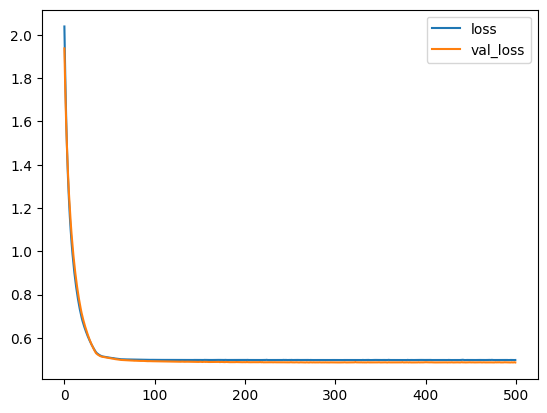

Running the model for lambda = 0.300000
Epoch 1/500
26/26 [==============================] - 1s 12ms/step - loss: 7.0527 - val_loss: 6.3948
Epoch 2/500
26/26 [==============================] - 0s 6ms/step - loss: 6.4121 - val_loss: 5.8063
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 5.8519 - val_loss: 5.3096
Epoch 4/500
26/26 [==============================] - 0s 6ms/step - loss: 5.3688 - val_loss: 4.8533
Epoch 5/500
26/26 [==============================] - 0s 6ms/step - loss: 4.9147 - val_loss: 4.4565
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 4.5130 - val_loss: 4.0773
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 4.1482 - val_loss: 3.7307
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 3.8105 - val_loss: 3.4304
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 3.5113 - val_loss: 3.1577
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - 

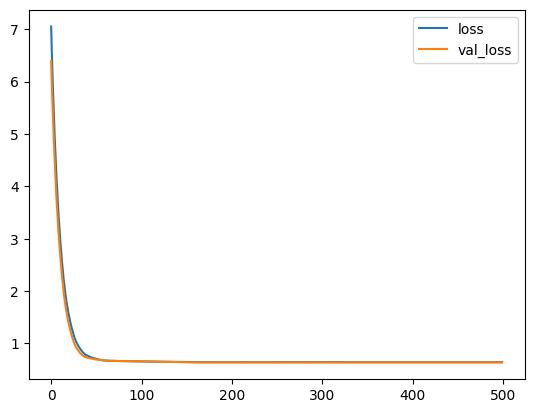

Running the model for lambda = 0.600000
Epoch 1/500
26/26 [==============================] - 1s 12ms/step - loss: 3.8767 - val_loss: 3.7381
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 3.4834 - val_loss: 3.3768
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 3.1582 - val_loss: 3.0920
Epoch 4/500
26/26 [==============================] - 0s 6ms/step - loss: 2.8914 - val_loss: 2.8459
Epoch 5/500
26/26 [==============================] - 0s 6ms/step - loss: 2.6562 - val_loss: 2.6188
Epoch 6/500
26/26 [==============================] - 0s 6ms/step - loss: 2.4427 - val_loss: 2.4147
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 2.2515 - val_loss: 2.2260
Epoch 8/500
26/26 [==============================] - 0s 6ms/step - loss: 2.0763 - val_loss: 2.0606
Epoch 9/500
26/26 [==============================] - 0s 6ms/step - loss: 1.9221 - val_loss: 1.9136
Epoch 10/500
26/26 [==============================] - 0s 6ms/step - 

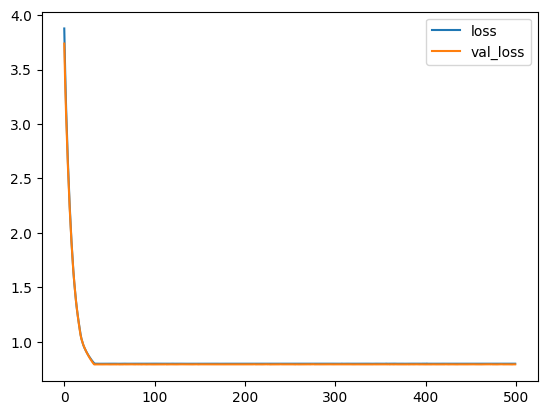

Running the model for lambda = 1.000000
Epoch 1/500
26/26 [==============================] - 1s 12ms/step - loss: 7.1664 - val_loss: 6.5058
Epoch 2/500
26/26 [==============================] - 0s 6ms/step - loss: 6.6341 - val_loss: 6.0276
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 6.1359 - val_loss: 5.5703
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 5.6702 - val_loss: 5.1529
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 5.2362 - val_loss: 4.7532
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 4.8273 - val_loss: 4.3917
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 4.4490 - val_loss: 4.0449
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 4.0898 - val_loss: 3.7322
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 3.7723 - val_loss: 3.4400
Epoch 10/500
26/26 [==============================] - 0s 5ms/step - 

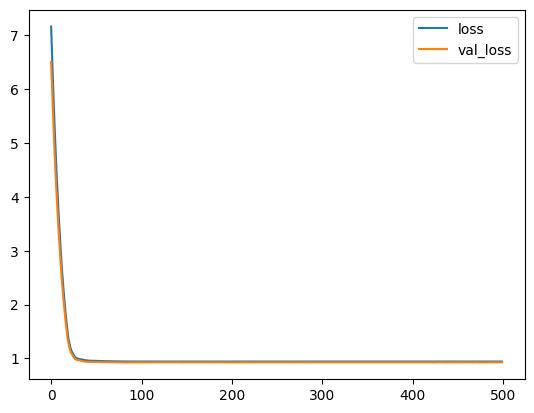

Running the model for lambda = 3.000000
Epoch 1/500
26/26 [==============================] - 1s 11ms/step - loss: 15.1339 - val_loss: 14.5519
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 14.0642 - val_loss: 13.4891
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 13.0118 - val_loss: 12.4352
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 11.9697 - val_loss: 11.3970
Epoch 5/500
26/26 [==============================] - 0s 5ms/step - loss: 10.9403 - val_loss: 10.3691
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 9.9430 - val_loss: 9.4460
Epoch 7/500
26/26 [==============================] - 0s 6ms/step - loss: 9.1042 - val_loss: 8.6465
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 8.3218 - val_loss: 7.8679
Epoch 9/500
26/26 [==============================] - 0s 6ms/step - loss: 7.5825 - val_loss: 7.1835
Epoch 10/500
26/26 [==============================] - 0s 6

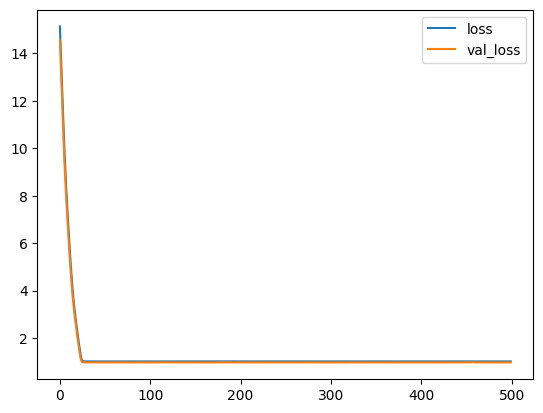

Running the model for lambda = 6.000000
Epoch 1/500
26/26 [==============================] - 1s 11ms/step - loss: 32.8125 - val_loss: 31.5095
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 30.4580 - val_loss: 29.1854
Epoch 3/500
26/26 [==============================] - 0s 5ms/step - loss: 28.1720 - val_loss: 27.0103
Epoch 4/500
26/26 [==============================] - 0s 6ms/step - loss: 26.1186 - val_loss: 25.0732
Epoch 5/500
26/26 [==============================] - 0s 6ms/step - loss: 24.2206 - val_loss: 23.2097
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 22.3715 - val_loss: 21.3873
Epoch 7/500
26/26 [==============================] - 0s 5ms/step - loss: 20.5619 - val_loss: 19.5955
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 18.7831 - val_loss: 17.8381
Epoch 9/500
26/26 [==============================] - 0s 6ms/step - loss: 17.0363 - val_loss: 16.1093
Epoch 10/500
26/26 [==============================

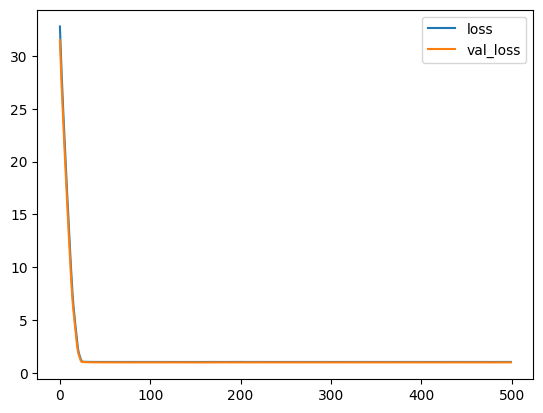

Running the model for lambda = 10.000000
Epoch 1/500
26/26 [==============================] - 3s 107ms/step - loss: 45.1756 - val_loss: 43.4079
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 41.8339 - val_loss: 40.1066
Epoch 3/500
26/26 [==============================] - 0s 6ms/step - loss: 38.5559 - val_loss: 36.8344
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 35.3044 - val_loss: 33.5842
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 32.0679 - val_loss: 30.3493
Epoch 6/500
26/26 [==============================] - 0s 5ms/step - loss: 28.8621 - val_loss: 27.2213
Epoch 7/500
26/26 [==============================] - 0s 6ms/step - loss: 25.8266 - val_loss: 24.2261
Epoch 8/500
26/26 [==============================] - 0s 5ms/step - loss: 22.9282 - val_loss: 21.4713
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 20.3942 - val_loss: 19.0938
Epoch 10/500
26/26 [============================

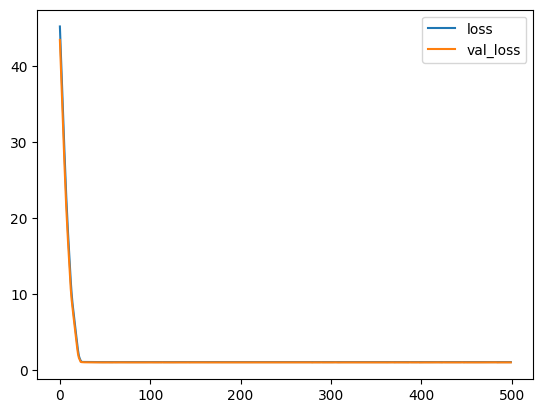

In [55]:
loss_values = []
for lam in penality:
    print('Running the model for lambda = %f'%lam)
    # initializing the model with lambda
    model_lasso = lasso_regression(lam)

    # fitting the model
    history = model_lasso.fit(x_train, y_train, batch_size = 100, epochs=500, validation_data=(x_test, y_test))

    # visualize loss for different iterations or epochs
    df_history = pd.DataFrame(history.history)
    df_history[['loss', 'val_loss']].plot()
    plt.show()

    # save the weight
    weights = model_lasso.get_weights() # column
    try:
        weight_penality = np.concatenate((weight_penality, weights[0].T), axis=0)

    except:
        weight_penality = weights[0].T # rows

    # loss
    loss_values.append(df_history.iloc[-1].to_dict())

## Feature Selection

In [58]:
len(penality)

43

In [64]:
log_lambda = np.log10(penality)

# weight
df_weights = pd.DataFrame(weight_penality)

# loss
df_loss = pd.DataFrame(loss_values)

In [75]:
list(log_lambda).index(-2)

32

visualization

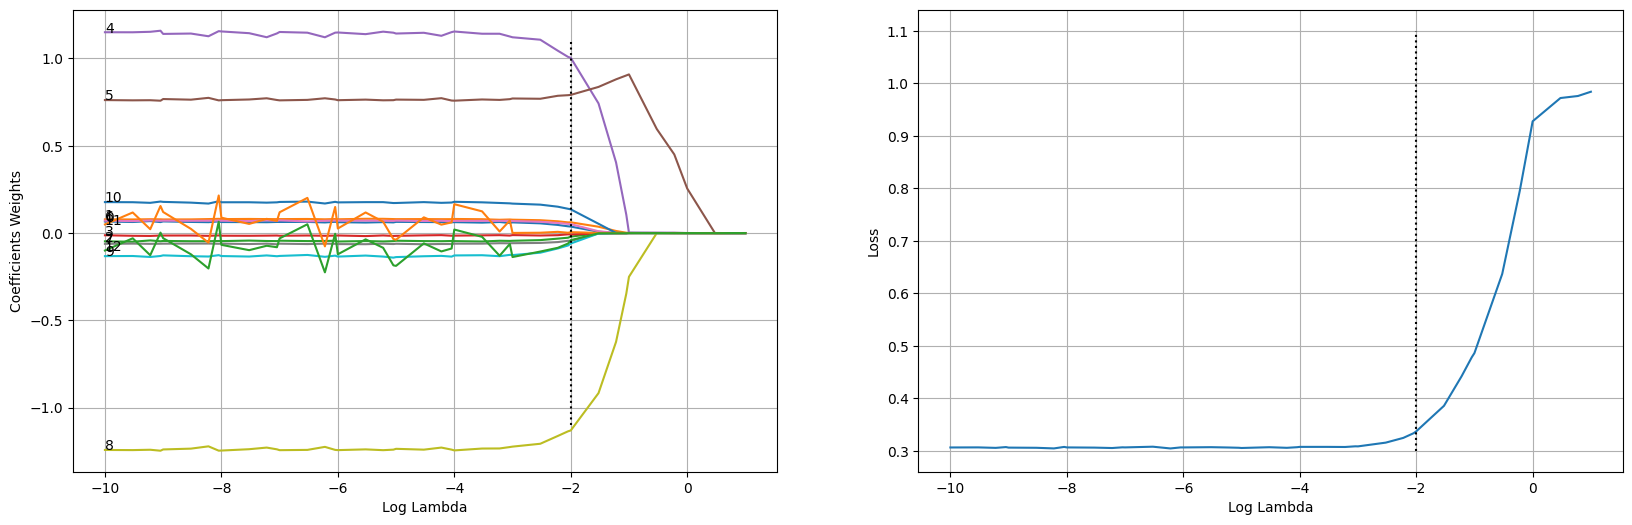

In [71]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(log_lambda, df_weights)
# label
plt.xlabel('Log Lambda')
plt.ylabel('Coefficients Weights')
plt.grid()
# weight number
for i in range(13):
    plt.text(-10,df_weights.iloc[0][i], '%d'%i)

plt.plot([-2, -2], [-1.1, 1.1], 'k:')

plt.subplot(1, 2, 2)
plt.plot(log_lambda, df_loss['val_loss'])
plt.xlabel('Log Lambda')
plt.ylabel('Loss')
plt.grid()
plt.plot([-2, -2], [0.3, 1.1], 'k:')

plt.show()

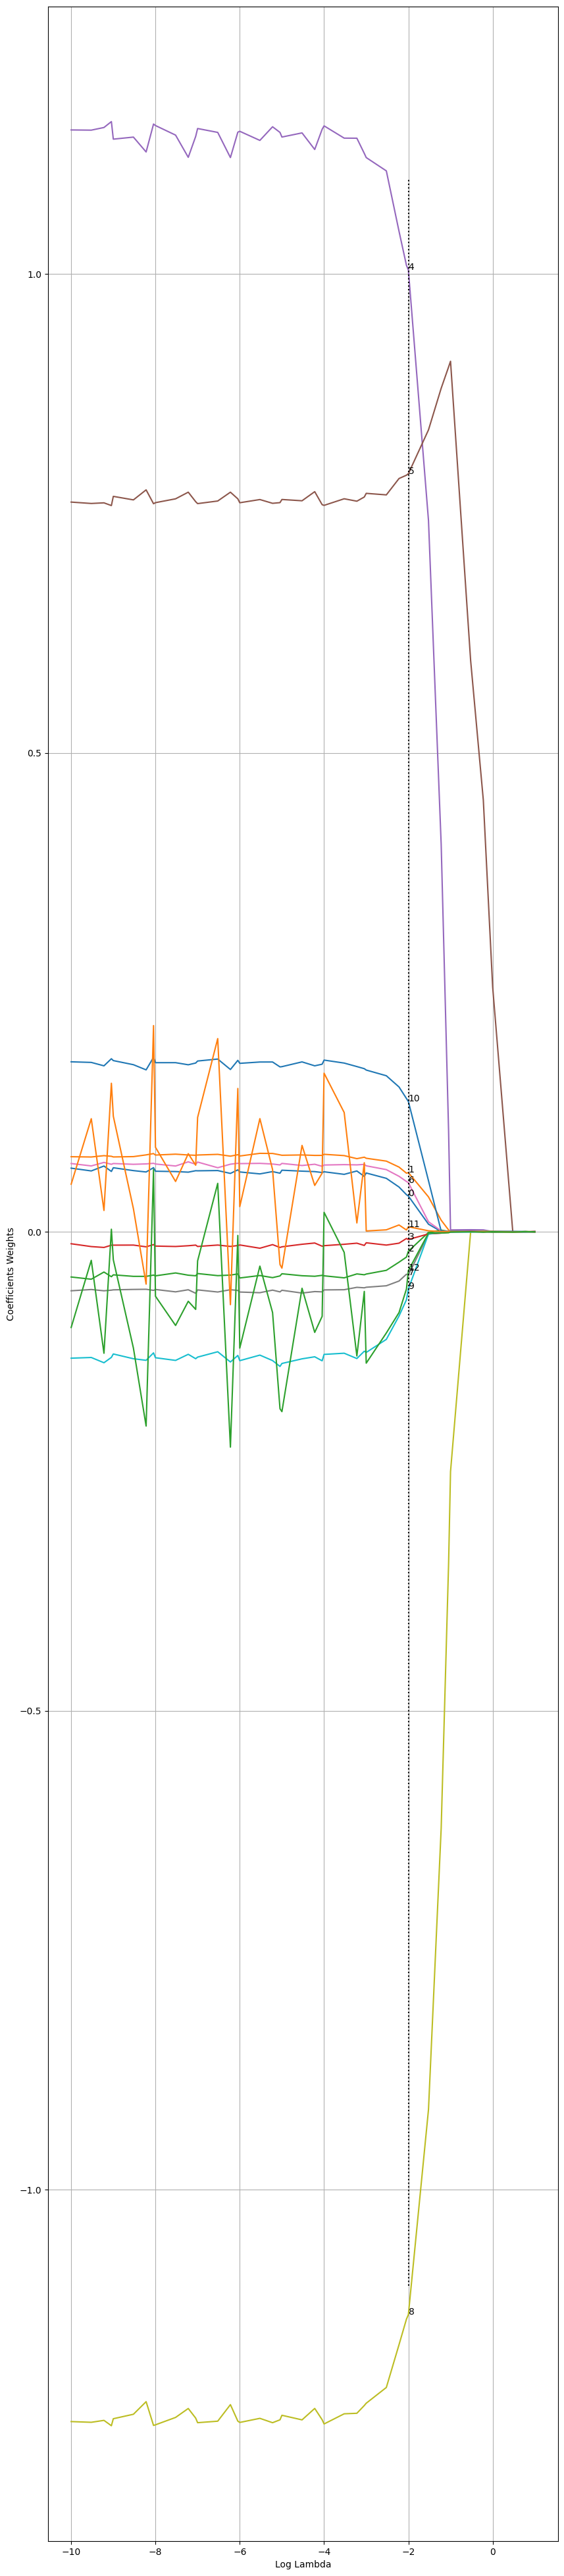

In [76]:
plt.figure(figsize=(10, 50))

plt.plot(log_lambda, df_weights)
# label
plt.xlabel('Log Lambda')
plt.ylabel('Coefficients Weights')
plt.grid()
# weight number
for i in range(13):
    plt.text(-2,df_weights.iloc[32][i], '%d'%i)

plt.plot([-2, -2], [-1.1, 1.1], 'k:')

***: 8, 4, 5

** : 10

* : 1, 0, 6, 7, 9

In [77]:
x

array([[-0.12086357, -1.09594743,  0.23570577, ...,  0.        ,
         0.        ,  1.        ],
       [-0.12086357, -1.09594743, -0.47008361, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.81599027, -1.09594743, -0.82297831, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.12086357,  0.08319439, -0.11718892, ...,  0.        ,
         0.        ,  1.        ],
       [-0.12086357,  0.6727653 , -0.11718892, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.84756335, -1.68551834, -0.47008361, ...,  1.        ,
         0.        ,  1.        ]])

In [78]:
x = pickle.load(open('preprocessing/x_norm.pickle', 'rb'))

In [80]:
x.drop('index', axis=1, inplace=True)

In [82]:
x.iloc[:, [8, 4, 5, 10, 1, 0, 6, 7, 9]].columns

Index(['NoOfGamesBought', 'FrquncyOfPurchase', 'NoOfUnitsPurchased',
       'fct_Favorite', 'MinAgeOfChild', 'NoOfChildren', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'city_1'],
      dtype='object')